### Data Preprocessing

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import joblib  # For saving preprocessed data
import os  # For creating directories if needed

In [4]:
# Set a random state for reproducibility
RANDOM_STATE = 42

Load the Dataset

In [5]:
# --- 1. Load the Dataset ---
print("--- 1. Loading Dataset (creditcard_2023.csv) ---")

file_path = '../data/creditcard_2023.csv'

try:
    df_2023 = pd.read_csv(file_path)
    print(f"Dataset '{file_path}' loaded successfully. Shape: {df_2023.shape}")
    print("First 5 Rows of the Dataset:")
    print(df_2023.head())
except FileNotFoundError:
    print(f"Error: Dataset not found at {file_path}. Please check the path.")
    exit()

print("\n" + "="*80 + "\n")

--- 1. Loading Dataset (creditcard_2023.csv) ---
Dataset '../data/creditcard_2023.csv' loaded successfully. Shape: (568630, 31)
First 5 Rows of the Dataset:
   id        V1        V2        V3        V4        V5        V6        V7  \
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0 -0.130006  0.727159  ... -0.110552  0.217606 -0.134794  0.165959  0.126280   
1 -0.133118  0.347452  ... -0.194936 -0.605761  0.079469 -0.577395  0.190090   
2 -0.095576 -0.261297  ... -0.005020  0.702906  0.945045 -1.154666 -0.605564   
3 -0.065130 -0.205698  ... -0.146927 -0.038212 -

Drop Unnecessary Columns

In [16]:
# --- 2. Drop Unnecessary Columns ---
print("--- 2. Dropping Unnecessary Columns ---")

# The 'id' column is a unique identifier and not a feature for modeling.
# Based on EDA, it also shows a highly artificial sequence-based separation of classes.
# Dropping it ensures the model learns from actual transactional attributes.
if 'id' in df_2023.columns:
    df_2023 = df_2023.drop('id', axis=1)
    print("Dropped 'id' column.")
else:
    print("'id' column not found, skipping drop.")

print("DataFrame head after dropping 'id':")
print(df_2023.head())
print(f"New DataFrame shape: {df_2023.shape}")

print("\nInsight: The 'id' column, which acted as an artifact of synthetic balancing, has been removed to ensure the model learns from intrinsic transaction features.")

print("\n" + "="*80 + "\n")

--- 2. Dropping Unnecessary Columns ---
'id' column not found, skipping drop.
DataFrame head after dropping 'id':
         V1        V2        V3        V4        V5        V6        V7  \
0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0 -0.130006  0.727159  0.637735  ... -0.110552  0.217606 -0.134794  0.165959   
1 -0.133118  0.347452  0.529808  ... -0.194936 -0.605761  0.079469 -0.577395   
2 -0.095576 -0.261297  0.690708  ... -0.005020  0.702906  0.945045 -1.154666   
3 -0.065130 -0.205698  0.575231  ... -0.146927 -0.038212 -0.214048 -1.893131   
4 -0.212660  1.049921  0.968046  ..

Feature Scaling

In [7]:
# --- 3. Feature Scaling ---
print("--- 3. Feature Scaling ---")

# Initialize StandardScaler
scaler_2023 = StandardScaler()  # Using a distinct scaler name for 2023 dataset

# Features to be scaled: 'Amount' and all 'V' features (V1-V28).
# Although V-features are anonymized, their original ranges might vary significantly,
# and scaling ensures they are on a consistent scale.
features_to_scale_2023 = ['Amount'] + [f'V{i}' for i in range(1, 29)]
print(f"Scaling {len(features_to_scale_2023)} features: {features_to_scale_2023[:5]}...{features_to_scale_2023[-5:]}")

# Fit and transform the selected features
df_2023[features_to_scale_2023] = scaler_2023.fit_transform(df_2023[features_to_scale_2023])

print("DataFrame head after scaling 'Amount' and 'V' features:")
# Display a subset of scaled columns for verification
print(df_2023[['Amount', 'V1', 'V2', 'V3', 'V26', 'V27', 'V28', 'Class']].head())

print("\nSummary statistics of scaled features (first 5 and last 5 for brevity):")
print(df_2023[features_to_scale_2023[:5] + features_to_scale_2023[-5:]].describe())

print("\nInsight: 'Amount' and all 'V' features have been scaled to have a mean of ~0 and standard deviation of ~1. This ensures consistent feature magnitudes for modeling.")

print("\n" + "="*80 + "\n")

--- 3. Feature Scaling ---
Scaling 29 features: ['Amount', 'V1', 'V2', 'V3', 'V4']...['V24', 'V25', 'V26', 'V27', 'V28']
DataFrame head after scaling 'Amount' and 'V' features:
     Amount        V1        V2        V3       V26       V27       V28  Class
0  0.858447 -0.260648 -0.469648  2.496266 -0.434824 -0.081230 -0.151045      0
1 -0.796369  0.985100 -0.356045  0.558056  0.296503 -0.248052 -0.064512      0
2 -1.377011 -0.260272 -0.949385  1.728538 -0.312895 -0.300258 -0.244718      0
3 -0.962119 -0.152152 -0.508959  1.746840 -0.515950 -0.165316  0.048424      0
4  0.323285 -0.206820 -0.165280  1.527053  1.071126  0.023712  0.419117      0

Summary statistics of scaled features (first 5 and last 5 for brevity):
             Amount            V1            V2             V3            V4  \
count  5.686300e+05  5.686300e+05  5.686300e+05  568630.000000  5.686300e+05   
mean  -4.021240e-16 -2.998967e-17 -2.599105e-17       0.000000 -2.879008e-17   
std    1.000001e+00  1.000001e+00  1

Define Features (X) and Target (y)

In [8]:
# --- 4. Define Features (X) and Target (y) ---
print("--- 4. Defining Features (X) and Target (y) ---")

# 'Class' is the target variable. All other columns are features.
X_2023 = df_2023.drop('Class', axis=1)
y_2023 = df_2023['Class']

print("Shape of X_2023 (features):", X_2023.shape)
print("Shape of y_2023 (target):", y_2023.shape)

print("\nFirst 5 rows of X_2023 (features):")
print(X_2023.head())

print("\nFirst 5 rows of y_2023 (target):")
print(y_2023.head())

print("\nInsight: Features (X) and target (y) have been successfully separated.")

print("\n" + "="*80 + "\n")

--- 4. Defining Features (X) and Target (y) ---
Shape of X_2023 (features): (568630, 29)
Shape of y_2023 (target): (568630,)

First 5 rows of X_2023 (features):
         V1        V2        V3        V4        V5        V6        V7  \
0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9       V10  ...       V20       V21       V22       V23  \
0 -0.130006  0.727159  0.637735  ...  0.091202 -0.110552  0.217606 -0.134794   
1 -0.133118  0.347452  0.529808  ... -0.233984 -0.194936 -0.605761  0.079469   
2 -0.095576 -0.261297  0.690708  ...  0.361652 -0.005020  0.702906  0.945045   
3 -0.065130 -0.205698  0.575231  ... -0.378223 -0.146927 -0.038212 -

Train-Test Split

In [17]:
# --- 5. Train-Test Split ---
print("--- 5. Train-Test Split ---")

# Split the data into training and testing sets
# test_size=0.20 means 20% for testing, 80% for training
# random_state for reproducibility
# stratify=y is still good practice even with a balanced dataset to ensure exact balance in splits
X_train_2023, X_test_2023, y_train_2023, y_test_2023 = train_test_split(X_2023, y_2023, test_size=0.20, random_state=RANDOM_STATE, stratify=y_2023)

print("Shape of X_train_2023:", X_train_2023.shape)
print("Shape of y_train_2023:", y_train_2023.shape)
print("Shape of X_test_2023:", X_test_2023.shape)
print("Shape of y_test_2023:", y_test_2023.shape)

--- 5. Train-Test Split ---
Shape of X_train_2023: (454904, 29)
Shape of y_train_2023: (454904,)
Shape of X_test_2023: (113726, 29)
Shape of y_test_2023: (113726,)


In [10]:
# Verify class distribution in training and testing sets
print("\nClass distribution in original 2023 dataset:")
print(y_2023.value_counts(normalize=True) * 100)

print("\nClass distribution in 2023 training set:")
print(y_train_2023.value_counts(normalize=True) * 100)

print("\nClass distribution in 2023 testing set:")
print(y_test_2023.value_counts(normalize=True) * 100)

print("\nInsight: Data successfully split into training and testing sets, with perfect class balance preserved due to stratification. This ensures reliable evaluation.")

print("\n" + "="*80 + "\n")


Class distribution in original 2023 dataset:
Class
0    50.0
1    50.0
Name: proportion, dtype: float64

Class distribution in 2023 training set:
Class
0    50.0
1    50.0
Name: proportion, dtype: float64

Class distribution in 2023 testing set:
Class
1    50.0
0    50.0
Name: proportion, dtype: float64

Insight: Data successfully split into training and testing sets, with perfect class balance preserved due to stratification. This ensures reliable evaluation.




Data Integrity and Saving

In [11]:
# --- 6. Data Integrity and Saving ---
print("--- 6. Data Integrity and Saving ---")

# Check for NaN values post-processing
print("NaN check after preprocessing:", X_2023.isnull().sum().sum())  # Check X before splitting

output_dir = '../data'  
os.makedirs(output_dir, exist_ok=True)

--- 6. Data Integrity and Saving ---
NaN check after preprocessing: 0


In [12]:
# Save preprocessed data as .pkl
output_filename = os.path.join(output_dir, 'preprocessed_data_2023.pkl')
joblib.dump((X_train_2023, X_test_2023, y_train_2023, y_test_2023), output_filename)

print(f"Preprocessed data for 2023 dataset saved to '{output_filename}'")

Preprocessed data for 2023 dataset saved to '../data\preprocessed_data_2023.pkl'


In [13]:
# Verify saved file
loaded_data_2023 = joblib.load(output_filename)
print("Loaded data shapes:", [d.shape for d in loaded_data_2023[:4]])

print("\nInsight: Data integrity verified, and preprocessed splits saved as .pkl for efficient modeling.")

print("\n" + "="*80 + "\n")

print("--- Data Preprocessing for creditcard_2023.csv (2023) Complete ---")

Loaded data shapes: [(454904, 29), (113726, 29), (454904,), (113726,)]

Insight: Data integrity verified, and preprocessed splits saved as .pkl for efficient modeling.


--- Data Preprocessing for creditcard_2023.csv (2023) Complete ---


### Model Selection & Training

In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib  # For loading preprocessed data
import os  # For path handling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, auc, f1_score, precision_score, recall_score

In [15]:
# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)  # Default figure size for plots

In [18]:
# Define a random state for reproducibility across all models
RANDOM_STATE = 42

Load Preprocessed Data

In [19]:
# --- 1. Load Preprocessed Data ---
print("--- 1. Loading Preprocessed Data for 2023 Dataset ---")
preprocessed_file_path = '../data/preprocessed_data_2023.pkl'

try:
    X_train_2023, X_test_2023, y_train_2023, y_test_2023 = joblib.load(preprocessed_file_path)
    print(f"Preprocessed data for 2023 dataset loaded successfully from '{preprocessed_file_path}'.")
    print(f"X_train_2023 shape: {X_train_2023.shape}, y_train_2023 shape: {y_train_2023.shape}")
    print(f"X_test_2023 shape: {X_test_2023.shape}, y_test_2023 shape: {y_test_2023.shape}")
except FileNotFoundError:
    print(f"Error: '{preprocessed_file_path}' not found. Please ensure Phase 2, Step 2 was completed and saved the file to the correct location.")
    exit()

print("\n" + "="*80 + "\n")

--- 1. Loading Preprocessed Data for 2023 Dataset ---
Preprocessed data for 2023 dataset loaded successfully from '../data/preprocessed_data_2023.pkl'.
X_train_2023 shape: (454904, 29), y_train_2023 shape: (454904,)
X_test_2023 shape: (113726, 29), y_test_2023 shape: (113726,)




Define Evaluation Function

In [20]:
# --- 2. Define Evaluation Function ---
# Copying the evaluation function from Phase 1 for consistency.
def evaluate_model(model, X_test, y_test, model_name, strategy_name, results_list):
    """
    Evaluates a trained classification model and prints key metrics,
    plots the Precision-Recall curve, and stores results.
    Args:
    model: Trained scikit-learn compatible classifier.
    X_test: Test features.
    y_test: True test labels.
    model_name (str): Name of the model (e.g., 'Logistic Regression').
    strategy_name (str): Name of the strategy (e.g., 'No Imbalance Handling', 'Balanced Data').
    results_list (list): List to append model results.
    """
    print(f"--- Evaluating {model_name} with {strategy_name} ---")

    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of the positive class (fraud)

    # 1. Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # 2. Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:")
    print(cm)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f'Confusion Matrix: {model_name} ({strategy_name})')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

    # 3. ROC AUC Score
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f"\nROC AUC Score: {roc_auc:.4f}")

    # 4. Precision-Recall Curve & AUPRC
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = auc(recall, precision)
    print(f"Precision-Recall AUC (AUPRC): {pr_auc:.4f}")

    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='darkorange', lw=2,
             label=f'PR curve (area = {pr_auc:.2f})')
    plt.xlabel('Recall (Fraud)')
    plt.ylabel('Precision (Fraud)')
    plt.title(f'Precision-Recall Curve: {model_name} ({strategy_name})')
    plt.legend(loc="lower left")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Store results for later comparison
    metrics = {
        'Model': model_name,
        'Strategy': strategy_name,
        'Accuracy': (cm[0,0] + cm[1,1]) / np.sum(cm),
        'Precision (Fraud)': precision_score(y_test, y_pred, pos_label=1),
        'Recall (Fraud)': recall_score(y_test, y_pred, pos_label=1),
        'F1-Score (Fraud)': f1_score(y_test, y_pred, pos_label=1),
        'ROC AUC': roc_auc,
        'AUPRC': pr_auc,
        'True Positives (TP)': cm[1,1],
        'False Positives (FP)': cm[0,1],
        'False Negatives (FN)': cm[1,0]
    }
    results_list.append(metrics)

    print("\n" + "="*80 + "\n")  # Separator

# Initialize a list to store results for all models in Phase 2
results_list_2023 = []

Model Training and Evaluation

--- 3. Model Training and Evaluation for 2023 Dataset ---
Insight: This dataset is perfectly balanced (50% fraud), so explicit imbalance handling techniques (like SMOTE, RUS) are not required for class correction. Models are trained directly on the balanced data.

--- Training Logistic Regression ---
--- Evaluating Logistic Regression with Balanced Data ---

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     56863
           1       0.98      0.95      0.96     56863

    accuracy                           0.97    113726
   macro avg       0.97      0.97      0.97    113726
weighted avg       0.97      0.97      0.97    113726


Confusion Matrix:
[[55603  1260]
 [ 2718 54145]]


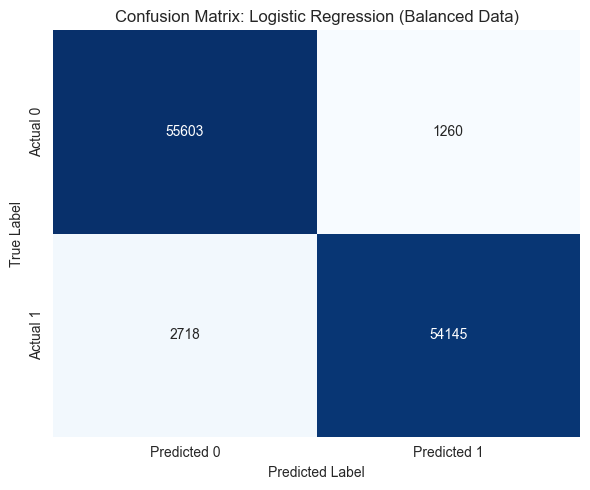


ROC AUC Score: 0.9935
Precision-Recall AUC (AUPRC): 0.9945


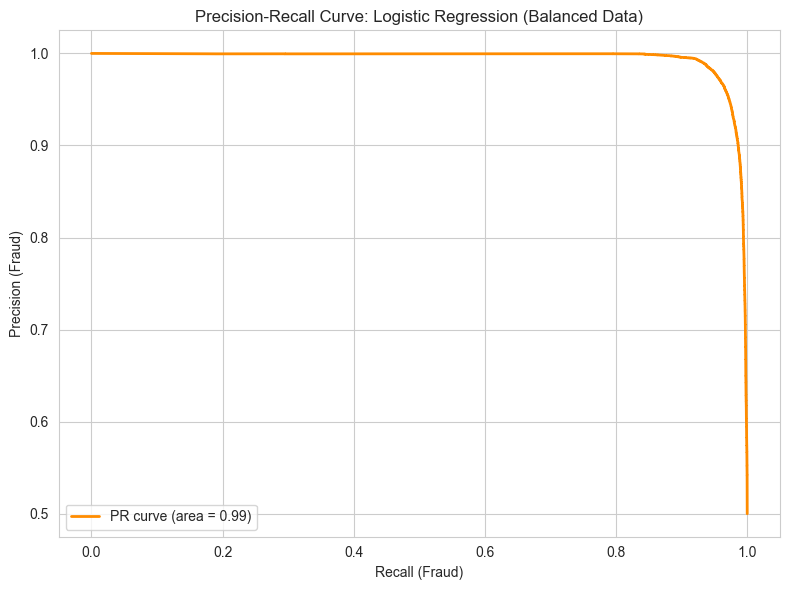




--- Training Random Forest Classifier ---
--- Evaluating Random Forest with Balanced Data ---

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726


Confusion Matrix:
[[56844    19]
 [    0 56863]]


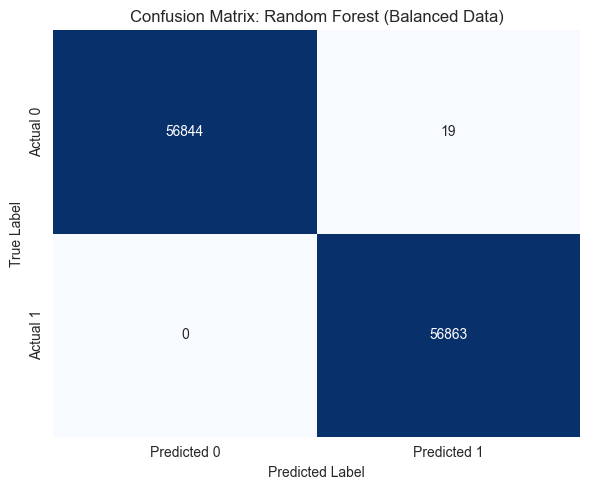


ROC AUC Score: 1.0000
Precision-Recall AUC (AUPRC): 1.0000


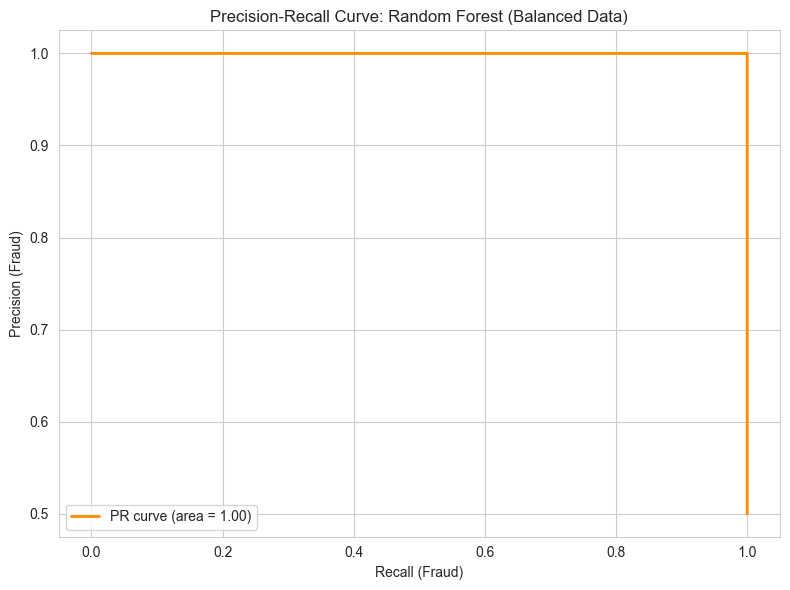




--- Training XGBoost Classifier ---


C:\Users\PAVITHRAN\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [15:25:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


--- Evaluating XGBoost with Balanced Data ---

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726


Confusion Matrix:
[[56829    34]
 [    0 56863]]


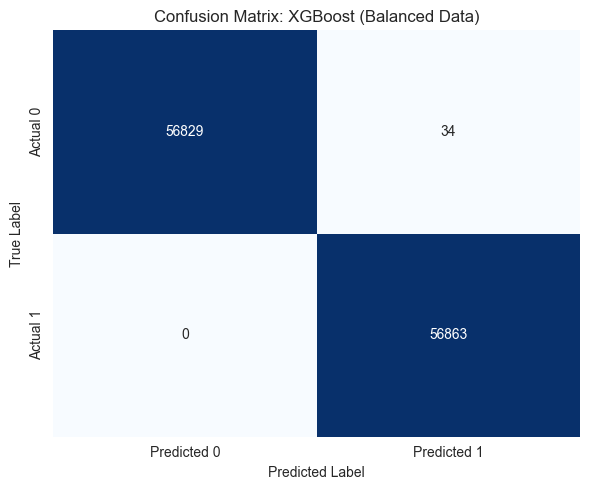


ROC AUC Score: 1.0000
Precision-Recall AUC (AUPRC): 1.0000


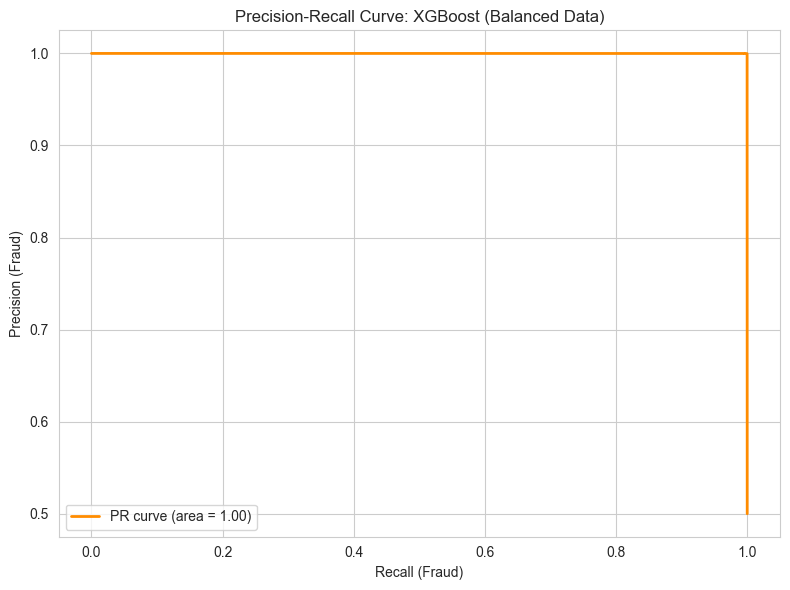




--- Optional: Exploring Class Weighting on Balanced Data ---
--- Evaluating Logistic Regression with Balanced Data (Class Weighting) ---

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     56863
           1       0.98      0.95      0.96     56863

    accuracy                           0.97    113726
   macro avg       0.97      0.97      0.97    113726
weighted avg       0.97      0.97      0.97    113726


Confusion Matrix:
[[55603  1260]
 [ 2718 54145]]


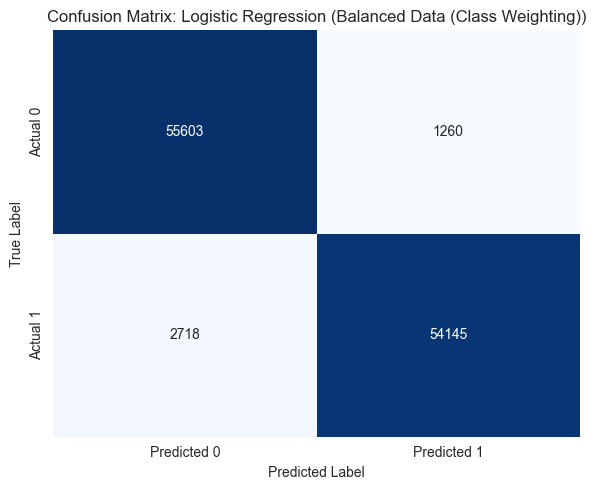


ROC AUC Score: 0.9935
Precision-Recall AUC (AUPRC): 0.9945


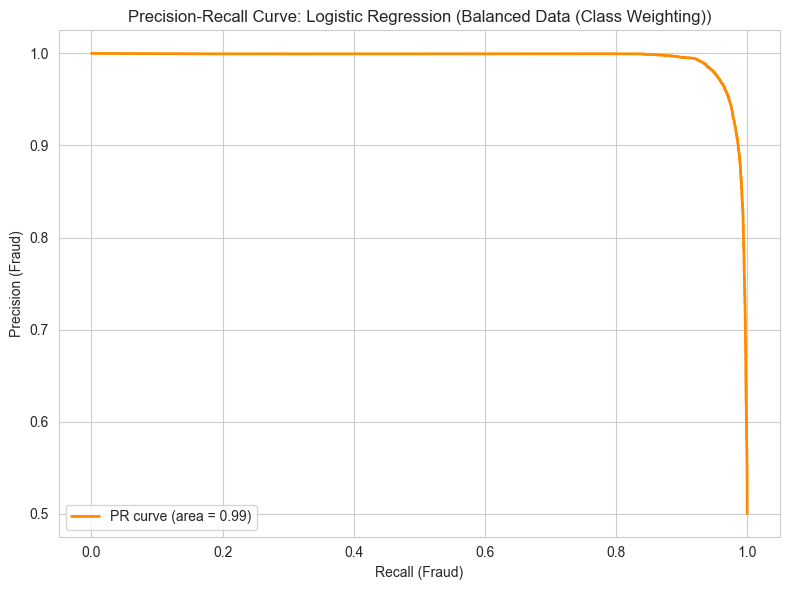

In [21]:
# --- 3. Model Training and Evaluation ---
print("--- 3. Model Training and Evaluation for 2023 Dataset ---")
print("Insight: This dataset is perfectly balanced (50% fraud), so explicit imbalance handling techniques (like SMOTE, RUS) are not required for class correction. Models are trained directly on the balanced data.")

# --- Strategy: Balanced Data (No explicit imbalance handling needed) ---

# Logistic Regression
print("\n--- Training Logistic Regression ---")
lr_2023 = LogisticRegression(solver='liblinear', random_state=RANDOM_STATE)
lr_2023.fit(X_train_2023, y_train_2023)
evaluate_model(lr_2023, X_test_2023, y_test_2023, 'Logistic Regression', 'Balanced Data', results_list_2023)

# Random Forest Classifier
print("\n--- Training Random Forest Classifier ---")
rf_2023 = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=100, n_jobs=-1)
rf_2023.fit(X_train_2023, y_train_2023)
evaluate_model(rf_2023, X_test_2023, y_test_2023, 'Random Forest', 'Balanced Data', results_list_2023)

# XGBoost Classifier
print("\n--- Training XGBoost Classifier ---")
# For XGBoost on a balanced dataset, use_label_encoder=False and eval_metric='logloss' are standard.
xgb_2023 = XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                        random_state=RANDOM_STATE, n_estimators=100, n_jobs=-1)
xgb_2023.fit(X_train_2023, y_train_2023)
evaluate_model(xgb_2023, X_test_2023, y_test_2023, 'XGBoost', 'Balanced Data', results_list_2023)

# --- Exploring Class Weighting on Balanced Data (for completeness) ---
# Although not strictly necessary to correct imbalance, it can sometimes be used
# to slightly adjust the model's focus. Observe if it makes a noticeable difference.
print("\n--- Optional: Exploring Class Weighting on Balanced Data ---")
lr_2023_cw = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=RANDOM_STATE)
lr_2023_cw.fit(X_train_2023, y_train_2023)
evaluate_model(lr_2023_cw, X_test_2023, y_test_2023, 'Logistic Regression', 'Balanced Data (Class Weighting)', results_list_2023)

Initial Performance Comparison Summary

In [22]:
# --- 4. Initial Performance Comparison Summary ---
print("--- 4. Initial Performance Comparison Summary for 2023 Dataset ---")

results_df_2023 = pd.DataFrame(results_list_2023)

# Sort by AUPRC (descending) as it's a robust metric, or by F1-Score for balanced view
results_df_2023_sorted = results_df_2023.sort_values(by='AUPRC', ascending=False)

print("\nSummary of Model Performance for 2023 Dataset (Sorted by AUPRC):")
print(results_df_2023_sorted[['Model', 'Strategy', 'Accuracy', 'Precision (Fraud)', 'Recall (Fraud)', 'F1-Score (Fraud)', 'AUPRC', 'ROC AUC', 'True Positives (TP)', 'False Positives (FP)', 'False Negatives (FN)']
].round(4))

print("\nInsight: Review the table above to identify which models provide the best performance metrics on this balanced fraud detection dataset.")

print("\n" + "="*80 + "\n")

--- 4. Initial Performance Comparison Summary for 2023 Dataset ---

Summary of Model Performance for 2023 Dataset (Sorted by AUPRC):
                 Model                         Strategy  Accuracy  \
1        Random Forest                    Balanced Data    0.9998   
2              XGBoost                    Balanced Data    0.9997   
0  Logistic Regression                    Balanced Data    0.9650   
3  Logistic Regression  Balanced Data (Class Weighting)    0.9650   

   Precision (Fraud)  Recall (Fraud)  F1-Score (Fraud)   AUPRC  ROC AUC  \
1             0.9997          1.0000            0.9998  1.0000   1.0000   
2             0.9994          1.0000            0.9997  1.0000   1.0000   
0             0.9773          0.9522            0.9646  0.9945   0.9935   
3             0.9773          0.9522            0.9646  0.9945   0.9935   

   True Positives (TP)  False Positives (FP)  False Negatives (FN)  
1                56863                    19                     0  
2      

Save Best Model (based on AUPRC)

In [24]:
# --- 5. Save Best Model (based on AUPRC) ---
print("--- 5. Save Best Model ---")
# Select the best model based on AUPRC
best_model_idx = results_df_2023['AUPRC'].idxmax()
best_model = [lr_2023, rf_2023, xgb_2023, lr_2023_cw][best_model_idx % 4]  # Map index to model list
best_model_name = results_df_2023.loc[best_model_idx, 'Model']
best_strategy = results_df_2023.loc[best_model_idx, 'Strategy']

output_model_file = os.path.join('../data', f'best_model_2023_{best_model_name.replace(" ", "_").lower()}_{best_strategy.replace(" ", "_").lower()}.pkl')
joblib.dump(best_model, output_model_file)
print(f"Best model ({best_model_name} with {best_strategy}) saved to {output_model_file}")

--- 5. Save Best Model ---
Best model (Random Forest with Balanced Data) saved to ../data\best_model_2023_random_forest_balanced_data.pkl


Visualize Feature Importance (for Tree-based Models)

--- 6. Visualize Feature Importance ---


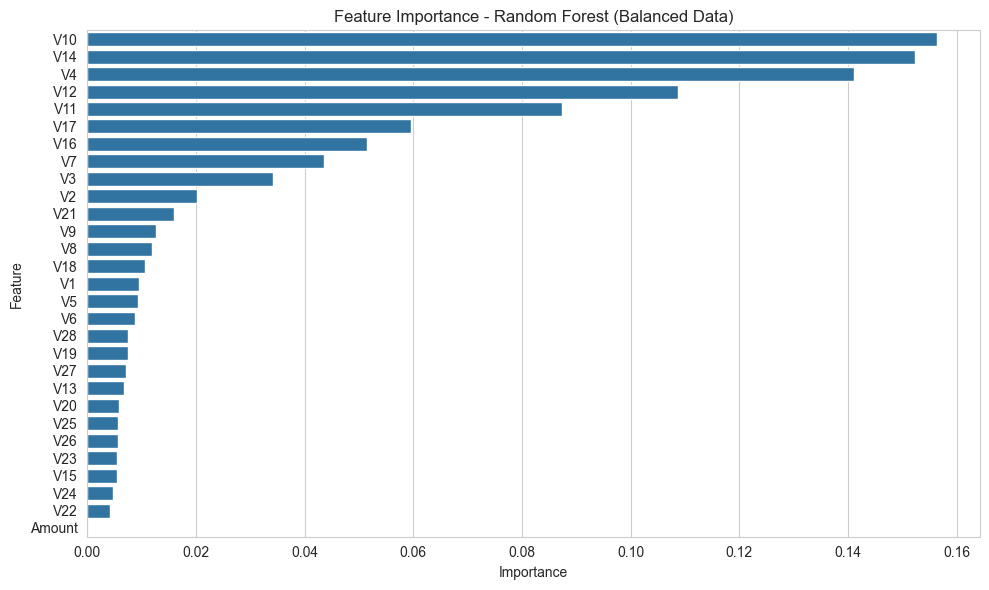



--- Phase 2, Step 3: Model Selection & Training Complete ---


In [25]:
# --- 6. Visualize Feature Importance (for Tree-based Models) ---
print("--- 6. Visualize Feature Importance ---")
if isinstance(best_model, (RandomForestClassifier, XGBClassifier)):
    # Extract feature importance
    importances = best_model.feature_importances_ if isinstance(best_model, RandomForestClassifier) else best_model.feature_importances_
    feature_names = X_train_2023.columns
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
    plt.title(f'Feature Importance - {best_model_name} ({best_strategy})')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.savefig(os.path.join('figures', f'feature_importance_{best_model_name.replace(" ", "_").lower()}_{best_strategy.replace(" ", "_").lower()}_2023.png'))
    plt.show()

print("\n" + "="*80 + "\n")

print("--- Phase 2, Step 3: Model Selection & Training Complete ---")